## Data Cleansing and exploratory analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
WORK_DIR = 'C:/Users/rvgra/Documents/HackerU/'
df = pd.read_csv(WORK_DIR + 'adult.data', delimiter = ', ', names = ['age','workclass','fnlwgt',
                                                                     'education','education-num','marital-status','occupation','relationship',
                                                                     'race','sex','capital-gain',
                                                                     'capital-loss','hours-per-week','native-country',
                                                                     'income_level'])
print(df.head())
df.shape

c:\users\rvgra\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income_level  
0          2174             0              40  United-States        <=50K  
1             0             0 

(32561, 15)

In [4]:
# fnlwgt is a column used in a different analysis using this data. Let's drop it
df.drop('fnlwgt',axis=1,inplace=True)
print(df.head())
df.shape

   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income_level  
0             0              40  United-States        <=50K  
1             0       

(32561, 14)

In [5]:
# for our continuous features, lets look at some general summary statistics
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


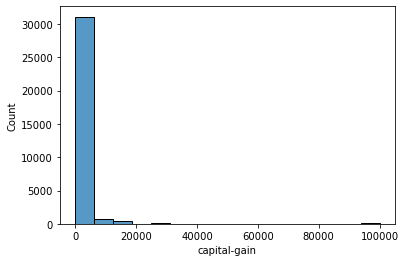

In [6]:
# we see a few signs of outliers for capital gain and capital loss because 1) mean far from median (50%) and 2) std >> than mean
# let's make a histogram and see if we can visualize the outlier point

sns.histplot(df['capital-gain'])


In [7]:
# We see that our summary statistics are dominated by people with zero capital gain. 
# Let's look at the statis without the zeros
df[df['capital-gain']!=0]['capital-gain'].describe()

count     2712.000000
mean     12938.541298
std      22395.413530
min        114.000000
25%       3411.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital-gain, dtype: float64

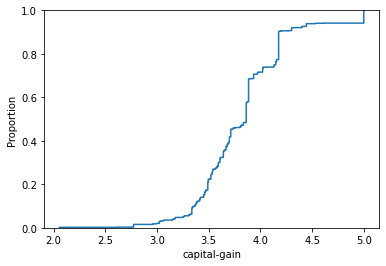

In [8]:
# still some signs of outliers, but we can see only 2712/32561 ~ 8% of observations have nonzero capital gain Let's look at the ecdf without the zeros on a log scale
sns.ecdfplot(np.log10(df[df['capital-gain']!=0]['capital-gain']))

In [9]:
# we see we retain ~90% of the nonzero observations at $10000. let's make our cut there and reexamine the stats
print(df[(df['capital-gain']!=0) & (df['capital-gain']<=10000)]['capital-gain'].describe())
print(df.shape)

count    1942.000000
mean     4863.661689
std      2296.376095
min       114.000000
25%      3103.000000
50%      4508.000000
75%      7298.000000
max      9562.000000
Name: capital-gain, dtype: float64
(32561, 14)


In [10]:
# looking good, and we lost only (2712 - 1942) / 32561 = 2.3% of observations
# let's apply the cut and do a similar analysis for 'capital-loss'
df = df[df['capital-gain']<=10000].reset_index(drop=True)
print(df.shape)

(31791, 14)


count    1519.000000
mean     1871.428571
std       376.571535
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64


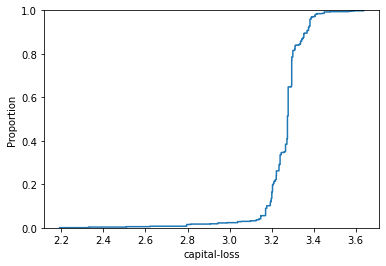

In [11]:
print(df[df['capital-loss']!=0]['capital-loss'].describe())
sns.ecdfplot(np.log10(df[df['capital-loss']!=0]['capital-loss']))

In [12]:
# the capital loss summary statistics look okay without the zeros. Let's keep all observations

In [13]:
# check for obvious NANs and nulls
print(df.isna().sum())
print(df.info())


age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_level      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31791 entries, 0 to 31790
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31791 non-null  int64 
 1   workclass       31791 non-null  object
 2   education       31791 non-null  object
 3   education-num   31791 non-null  int64 
 4   marital-status  31791 non-null  object
 5   occupation      31791 non-null  object
 6   relationship    31791 non-null  object
 7   race            31791 non-null  object
 8   sex             31791 non-null  object
 9   capital-gain    31791 non-null  int64 
 10  capital-loss    31791 non-null  int64 
 11  hours-per-week  31791

In [14]:
# drop native country
df.drop('native-country', axis=1, inplace=True)
print(df.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income_level'],
      dtype='object')


In [15]:
# engineer y-variable feature
df['if_50'] = np.where(df['income_level']=='<=50K', 0, 1)
print(df[['income_level','if_50']].head())

  income_level  if_50
0        <=50K      0
1        <=50K      0
2        <=50K      0
3        <=50K      0
4        <=50K      0


In [16]:
# for categorical variables, let's do value counts and see if we spot anything
X_cat = ['workclass','marital-status','occupation','relationship','race','sex']
for cur_x in X_cat:
    print(df[cur_x].value_counts())
    print('\n')

Private             22238
Self-emp-not-inc     2447
Local-gov            2060
?                    1815
State-gov            1273
Self-emp-inc          997
Federal-gov           940
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


Married-civ-spouse       14439
Never-married            10570
Divorced                  4359
Separated                 1013
Widowed                    976
Married-spouse-absent      411
Married-AF-spouse           23
Name: marital-status, dtype: int64


Craft-repair         4053
Prof-specialty       3891
Exec-managerial      3816
Adm-clerical         3741
Sales                3546
Other-service        3289
Machine-op-inspct    1998
?                    1822
Transport-moving     1579
Handlers-cleaners    1368
Farming-fishing       978
Tech-support          914
Protective-serv       639
Priv-house-serv       148
Armed-Forces            9
Name: occupation, dtype: int64


Husband           12716
Not-in-family      8124
Own-child

In [17]:
# we see the ? represents null values. let's remove all rows with that
df_cut = df.replace({'?':np.nan})
df_cut.dropna(inplace=True)
print(df_cut.shape[0])
print(df.shape[0])

29969
31791


In [18]:
# we lost (31791-29969) / 31791: ~5.7% of observations
df = df_cut.copy()
print(df.shape)

(29969, 14)


In [19]:
for cur_x in X_cat:
    print(df[cur_x].value_counts())
    print('\n')

Private             22238
Self-emp-not-inc     2447
Local-gov            2060
State-gov            1273
Self-emp-inc          997
Federal-gov           940
Without-pay            14
Name: workclass, dtype: int64


Married-civ-spouse       13815
Never-married             9804
Divorced                  4175
Separated                  947
Widowed                    825
Married-spouse-absent      382
Married-AF-spouse           21
Name: marital-status, dtype: int64


Craft-repair         4053
Prof-specialty       3891
Exec-managerial      3816
Adm-clerical         3741
Sales                3546
Other-service        3289
Machine-op-inspct    1998
Transport-moving     1579
Handlers-cleaners    1368
Farming-fishing       978
Tech-support          914
Protective-serv       639
Priv-house-serv       148
Armed-Forces            9
Name: occupation, dtype: int64


Husband           12237
Not-in-family      7689
Own-child          4511
Unmarried          3241
Wife               1379
Other-relative 

#### The most challenging part of this dataset is the number of categories in these datasets. Let's try to find some natural groupings
1. workclass: {Self-emp-not-inc, Self-emp-inc} -> Self-emp
2. marital-status: {Married-civ-spouse, Married-spouse-absent, Married-AF-spouse} -> Married

Let's not make too many assumptions besides these
Now let's make these groupings and use one-hot enconding to change these categorical values to numeric

In [20]:
df.replace({'Self-emp-not-inc':'Self-emp', 'Self-emp-inc':'Self-emp'}, inplace=True)
print(df['workclass'].value_counts())

Private        22238
Self-emp        3444
Local-gov       2060
State-gov       1273
Federal-gov      940
Without-pay       14
Name: workclass, dtype: int64


In [21]:
df.replace({'Married-civ-spouse':'Married', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'}, inplace=True)
print(df['marital-status'].value_counts())

Married          14218
Never-married     9804
Divorced          4175
Separated          947
Widowed            825
Name: marital-status, dtype: int64


In [22]:
# convert categorical to numeric
df.replace({'Male':1,'Female':0},inplace=True)
print(df.sex.head())

0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: int64


In [23]:
# one hot encoding
df_dummies = pd.get_dummies(df[['workclass','marital-status','race','occupation','relationship']])

In [24]:
print(df_dummies.columns)
# let's drop the least frequent class to avoid linear independence issues
df_dummies.drop(['workclass_Without-pay','marital-status_Widowed','race_Other','occupation_Armed-Forces','relationship_Other-relative'],axis=1,inplace=True)
print(df_dummies.columns)

Index(['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp', 'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       're

In [25]:
# let's combine our dummy dataframe with the original
print(df.shape)
print(df_dummies.shape)


df_tot = pd.concat([df, df_dummies],axis=1).reset_index(drop=True)
print(df_tot.shape)

(29969, 14)
(29969, 31)
(29969, 45)


In [26]:
# lets check education num working as expected
print(pd.DataFrame({'education':df_tot.education.unique(),'num':df_tot['education-num'].unique()}).sort_values('num'))

       education  num
13     Preschool    1
15       1st-4th    2
11       5th-6th    3
8        7th-8th    4
4            9th    5
12          10th    6
2           11th    7
14          12th    8
1        HS-grad    9
5   Some-college   10
7      Assoc-voc   11
6     Assoc-acdm   12
0      Bachelors   13
3        Masters   14
10   Prof-school   15
9      Doctorate   16


In [27]:
# let's define some variable sets for later ease
X_work = [x for x in df_tot.columns if 'workclass_' in x]
print(X_work)
X_marital = [x for x in df_tot.columns if 'marital-status_' in x]
print(X_marital)
X_occ = [x for x in df_tot.columns if 'occupation_' in x]
print(X_occ)
X_relation = [x for x in df_tot.columns if 'relationship_' in x]
print(X_relation)
X_race =  [x for x in df_tot.columns if 'race_' in x]
print(X_race)

['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp', 'workclass_State-gov']
['marital-status_Divorced', 'marital-status_Married', 'marital-status_Never-married', 'marital-status_Separated']
['occupation_Adm-clerical', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving']
['relationship_Husband', 'relationship_Not-in-family', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife']
['race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_White']


In [28]:
X_cont = ['age','education-num','sex','capital-gain','capital-loss','hours-per-week']
X_cat = X_work + X_marital + X_relation + X_race
X_all = X_cont + X_cat
y_var = 'if_50'
print(df_tot[y_var].value_counts())
print(df_tot[X_all + [y_var]].shape)

0    23056
1     6913
Name: if_50, dtype: int64
(29969, 25)


* In total, we have 29,969 and 25 columns after cleaning. We thus lost (32561-29969) / 32561 ~8% observations cleaning
* 25 -variables is somewhat high-dimensional, which makes inference tricky. 
    * We can perform some additional analysis to reduce our dimensionality
* Also note the class imbalance--much more <=50K than above, which makes accuracy a skewed metric (guessing all zero would be right ~77% of the time)

* To get a quick look at the data, let's do a logistic regression with the entire dataset


In [29]:
import statsmodels.api as sm
log_reg = sm.Logit(df_tot[y_var], df_tot[X_all]).fit() 

Optimization terminated successfully.
         Current function value: 0.346388
         Iterations 9


In [30]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  if_50   No. Observations:                29969
Model:                          Logit   Df Residuals:                    29945
Method:                           MLE   Df Model:                           23
Date:                Sun, 07 Mar 2021   Pseudo R-squ.:                  0.3586
Time:                        16:25:52   Log-Likelihood:                -10381.
converged:                       True   LL-Null:                       -16186.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                              0.0246      0.002     15.262      0.000       0.021       0.028
education-num                    0.3512      0.008     43.947      0.000     

### Even a bad-performing logistic regression can give us some insight. Notably that the one-hot encoded variables are in general quite noisy and that the other vars scale intuitively
* As a result, let's do some further variance reduction using PCA on the one-hot encoded variables, even if we may lose some interpretability

In [31]:
# let's do 2 or 3 PC per column
print('work')
from sklearn.decomposition import PCA
pca_work = PCA(n_components=3)
pca_work.fit(df_tot[X_work])
print(pca_work.explained_variance_ratio_)
print(np.sum(pca_work.explained_variance_ratio_))
df_work_pca = pd.DataFrame(pca_work.fit_transform(df_tot[X_work]), columns=['pca_work_1', 'pca_work_2', 'pca_work_3'])
print(df_work_pca.head())
print('\n')

print('marital')
pca_marital = PCA(n_components=2)
pca_marital.fit(df_tot[X_marital])
print(pca_marital.explained_variance_ratio_)
print(np.sum(pca_marital.explained_variance_ratio_))
df_marital_pca = pd.DataFrame(pca_marital.fit_transform(df_tot[X_marital]), columns=['pca_marital_1', 'pca_marital_2'])
print(df_marital_pca.head())
print('\n')

print('relationship')
pca_relation = PCA(n_components=3)
pca_relation.fit(df_tot[X_relation])
print(pca_relation.explained_variance_ratio_)
print(np.sum(pca_relation.explained_variance_ratio_))
df_relation_pca = pd.DataFrame(pca_relation.fit_transform(df_tot[X_relation]), columns=['pca_relation_1', 'pca_relation_2', 'pca_relation_3'])
print(df_relation_pca.head())
print('\n')

print('race')
pca_race = PCA(n_components=2)
pca_race.fit(df_tot[X_race])
print(pca_race.explained_variance_ratio_)
print(np.sum(pca_race.explained_variance_ratio_))
df_race_pca = pd.DataFrame(pca_race.fit_transform(df_tot[X_race]), columns=['pca_race_1', 'pca_race_2'])
print(df_race_pca.head())
print('\n')


work
[0.59697057 0.20340661 0.1187086 ]
0.9190857678183731
   pca_work_1  pca_work_2  pca_work_3
0    0.671592    0.336817    0.882365
1    1.017361   -0.540232   -0.115016
2   -0.294292   -0.022948   -0.010664
3   -0.294292   -0.022948   -0.010664
4   -0.294292   -0.022948   -0.010664


marital
[0.63225682 0.28966306]
0.9219198858049594
   pca_marital_1  pca_marital_2
0       0.787822      -0.275488
1      -0.619612      -0.137870
2       0.202175       1.009399
3      -0.619612      -0.137870
4      -0.619612      -0.137870


relationship
[0.46942774 0.27035364 0.17424264]
0.9140240161792523
   pca_relation_1  pca_relation_2  pca_relation_3
0        0.719476       -0.477041       -0.093420
1       -0.654513       -0.146363       -0.043894
2        0.719476       -0.477041       -0.093420
3       -0.654513       -0.146363       -0.043894
4        0.183889        0.223480        0.165218


race
[0.76574251 0.17758999]
0.9433324993506773
   pca_race_1  pca_race_2
0   -0.175787   -0.0166

In [32]:
df_pca = pd.concat([df_work_pca,df_marital_pca,df_relation_pca,df_race_pca],axis=1).reset_index(drop=True)
print(df_pca.head())
print(df_pca.shape)

   pca_work_1  pca_work_2  pca_work_3  pca_marital_1  pca_marital_2  \
0    0.671592    0.336817    0.882365       0.787822      -0.275488   
1    1.017361   -0.540232   -0.115016      -0.619612      -0.137870   
2   -0.294292   -0.022948   -0.010664       0.202175       1.009399   
3   -0.294292   -0.022948   -0.010664      -0.619612      -0.137870   
4   -0.294292   -0.022948   -0.010664      -0.619612      -0.137870   

   pca_relation_1  pca_relation_2  pca_relation_3  pca_race_1  pca_race_2  
0        0.719476       -0.477041       -0.093420   -0.175787   -0.016685  
1       -0.654513       -0.146363       -0.043894   -0.175787   -0.016685  
2        0.719476       -0.477041       -0.093420   -0.175787   -0.016685  
3       -0.654513       -0.146363       -0.043894    1.216146   -0.264197  
4        0.183889        0.223480        0.165218    1.216146   -0.264197  
(29969, 10)


In [33]:
print(df_tot.shape)
print(df_pca.shape)
df_final = pd.concat([df_tot, df_pca],axis=1)
print(df_final.shape)

(29969, 45)
(29969, 10)
(29969, 55)


In [34]:
print(df_final.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income_level', 'if_50',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp', 'workclass_State-gov', 'marital-status_Divorced',
       'marital-status_Married', 'marital-status_Never-married',
       'marital-status_Separated', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_White',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Husband',
 

In [35]:
X_final = X_cont + [x for x in df_final.columns if 'pca' in x]
print(X_final)
print(len(X_final))

['age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'pca_work_1', 'pca_work_2', 'pca_work_3', 'pca_marital_1', 'pca_marital_2', 'pca_relation_1', 'pca_relation_2', 'pca_relation_3', 'pca_race_1', 'pca_race_2']
16


In [36]:
import statsmodels.api as sm
log_reg = sm.Logit(df_final[y_var], df_final[X_final]).fit() 

Optimization terminated successfully.
         Current function value: 0.419748
         Iterations 8


In [37]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  if_50   No. Observations:                29969
Model:                          Logit   Df Residuals:                    29953
Method:                           MLE   Df Model:                           15
Date:                Sun, 07 Mar 2021   Pseudo R-squ.:                  0.2228
Time:                        16:26:16   Log-Likelihood:                -12579.
converged:                       True   LL-Null:                       -16186.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0289      0.001    -24.215      0.000      -0.031      -0.027
education-num      0.0867      0.005     16.176      0.000       0.076       0.097
sex               -1.1189      0.062

#### Now the standard errors per variable have been reduced and all are around the same order of magnitude

# Predictive Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

## Random Forest

In [40]:
X_model, y_model = df_final[X_final], df_final[y_var]
print(X_model.shape, y_model.shape)
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,
                                                stratify=y_model, 
                                                test_size=1/3)
print(X_train.shape, X_test.shape)
rf = RandomForestClassifier(n_estimators = 10000, max_depth=8, min_samples_leaf=80, verbose=1)

(29969, 16) (29969,)
(19979, 16) (9990, 16)


In [41]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   49.2s finished


RandomForestClassifier(max_depth=8, min_samples_leaf=80, n_estimators=10000,
                       verbose=1)

In [42]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
y_prob_train = rf.predict_proba(X_train)
y_prob_test = rf.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    7.1s finished


Training group metrics
              precision    recall  f1-score       support
0              0.860569  0.952505  0.904206  15370.000000
1              0.753960  0.485355  0.590549   4609.000000
accuracy       0.844737  0.844737  0.844737      0.844737
macro avg      0.807265  0.718930  0.747378  19979.000000
weighted avg   0.835975  0.844737  0.831848  19979.000000
AUC (training): 0.896


Testing group metrics
              precision    recall  f1-score      support
0              0.856357  0.952511  0.901879  7686.000000
1              0.746704  0.467014  0.574633  2304.000000
accuracy       0.840541  0.840541  0.840541     0.840541
macro avg      0.801531  0.709762  0.738256  9990.000000
weighted avg   0.831068  0.840541  0.826406  9990.000000
AUC (testing): 0.888


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    7.0s finished


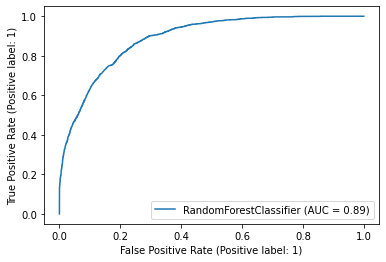

In [44]:
report = classification_report(y_train, y_pred_train, output_dict=True)
df_report_train = pd.DataFrame(report).transpose()
print('Training group metrics')
print(df_report_train)
auc_train = roc_auc_score(y_train,y_prob_train[:, 1])
print('AUC (training): %.3f'%auc_train)
print('\n')
report = classification_report(y_test, y_pred_test, output_dict=True)
df_report_test = pd.DataFrame(report).transpose()
print('Testing group metrics')
print(df_report_test)
auc_test = roc_auc_score(y_test,y_prob_test[:, 1])
print('AUC (testing): %.3f'%auc_test)
plot_roc_curve(rf, X_test, y_test)

### Overall, Random Forest performs quite well
 1. Training and testing metrics are very similar, indicating we are not overfitting
 2. Overall Accuracy and AUC are above 0.8
 3. However we suffer particularly in recall of the >50K class.
     * The meaning here is that when the model classified a person as >50K it is usually right (high precision), but it has trouble finding the >50K class in the first place

In [45]:
# let's look at feature importance as well
df_importance = pd.DataFrame({'name':X_final, 'importance':rf.feature_importances_})
print(df_importance.sort_values('importance',ascending=False))


              name  importance
1    education-num    0.223075
9    pca_marital_1    0.205182
11  pca_relation_1    0.152292
3     capital-gain    0.086077
13  pca_relation_3    0.080925
0              age    0.062505
10   pca_marital_2    0.059351
4     capital-loss    0.042622
5   hours-per-week    0.036952
12  pca_relation_2    0.034565
2              sex    0.005794
6       pca_work_1    0.003030
8       pca_work_3    0.002988
7       pca_work_2    0.002799
14      pca_race_1    0.001250
15      pca_race_2    0.000595


## Logistic Regression


In [46]:
X_log_train = X_train.copy()
X_log_train['intercept'] = 1.
log_reg_train = sm.Logit(y_train, X_log_train).fit() 

print(log_reg_train.summary())


Optimization terminated successfully.
         Current function value: 0.349361
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  if_50   No. Observations:                19979
Model:                          Logit   Df Residuals:                    19962
Method:                           MLE   Df Model:                           16
Date:                Sun, 07 Mar 2021   Pseudo R-squ.:                  0.3532
Time:                        16:30:17   Log-Likelihood:                -6979.9
converged:                       True   LL-Null:                       -10791.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0253      0.002     13.084      0.000       0.022       0.029
education-num    

### z-score rankings are generally aligned with RF feature importances which is a good sign.
* Let's use sklearn for more flexibility 

In [47]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Training group metrics
              precision    recall  f1-score       support
0              0.865176  0.928953  0.895931  15370.000000
1              0.685846  0.517249  0.589734   4609.000000
accuracy       0.833976  0.833976  0.833976      0.833976
macro avg      0.775511  0.723101  0.742832  19979.000000
weighted avg   0.823806  0.833976  0.825294  19979.000000
AUC (training): 0.881


Testing group metrics
              precision    recall  f1-score      support
0              0.863273  0.926620  0.893825  7686.000000
1              0.675862  0.510417  0.581602  2304.000000
accuracy       0.830631  0.830631  0.830631     0.830631
macro avg      0.769567  0.718518  0.737714  9990.000000
weighted avg   0.820050  0.830631  0.821817  9990.000000
AUC (testing): 0.877


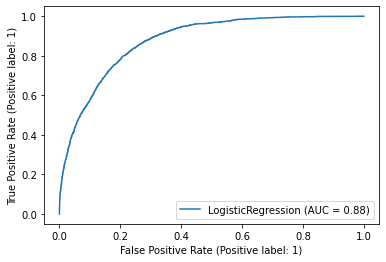

In [48]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
y_prob_train = lr.predict_proba(X_train)
y_prob_test = lr.predict_proba(X_test)

report = classification_report(y_train, y_pred_train, output_dict=True)
df_report_train = pd.DataFrame(report).transpose()
print('Training group metrics')
print(df_report_train)
auc_train = roc_auc_score(y_train,y_prob_train[:, 1])
print('AUC (training): %.3f'%auc_train)
print('\n')
report = classification_report(y_test, y_pred_test, output_dict=True)
df_report_test = pd.DataFrame(report).transpose()
print('Testing group metrics')
print(df_report_test)
auc_test = roc_auc_score(y_test,y_prob_test[:, 1])
print('AUC (testing): %.3f'%auc_test)
plot_roc_curve(lr, X_test, y_test)

Interestingly, we improve our recall at the cost of precision and F1 improves slightly.

# Summary
* Cleaned data of outliers and missing values, removing ~8% of observations
* We used PCA to reduce dimensionality of some high-number categorical features (workclass, marital-status, occupation, relationship, race) to reduce variance and improve modeling performance
    * This step also makes the results less transparency since PCs are not intuitive features. More analysis could be done to find which variables are most strongly correlated with what PCs and could even do some cluster visualization to provide further insight
* We used both Random Forest and Logistic Regression as classifiers
    * Both performed quite well, with some noticeable recall/precision differences
    * RF can find non-linear relationships between the variables which LR may not pick up on
    * However LR can provide more interpretable results and give insights into the scaling effects of each variable
    * In general, LR requires more care and further digging into data to ensure collinearities are not present as one example (something partially accomplished with PCA)
    * RF also requires more computing power and hyperparameter tuning than LR